## WORKED EXAMPLE FOR CROSS VALIDATION


## Dataset:
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

###### Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#### Load the Iris dataset

In [8]:
iris = load_iris()
X, y = iris.data, iris.target

#### Initialize logistic regression model

In [9]:
model = LogisticRegression(max_iter=1000)  


#### K-Fold Cross-Validation

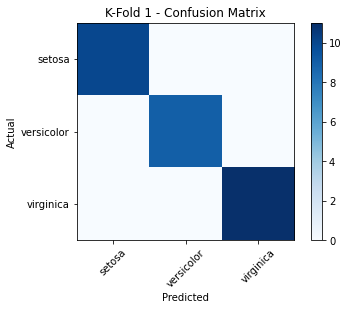

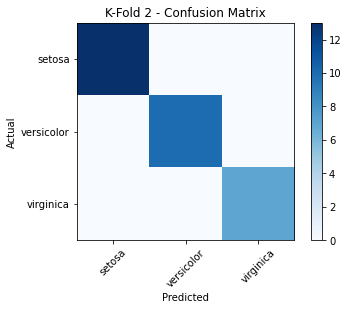

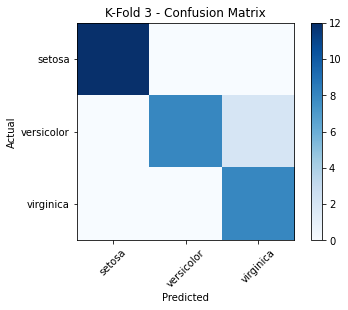

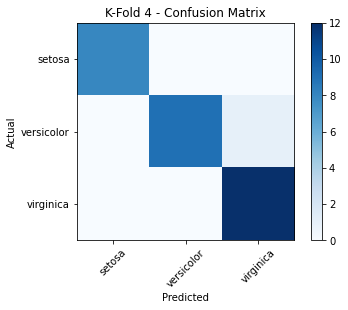

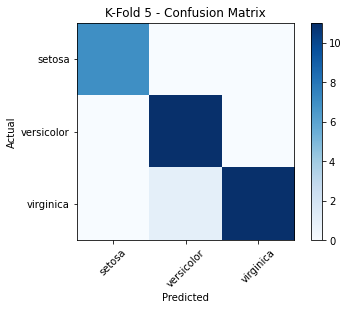

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict using the trained model
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'K-Fold {i+1} - Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

 


#### Stratified K-Fold Cross-Validation

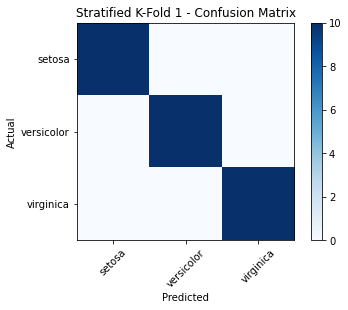

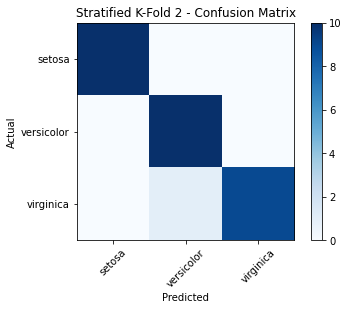

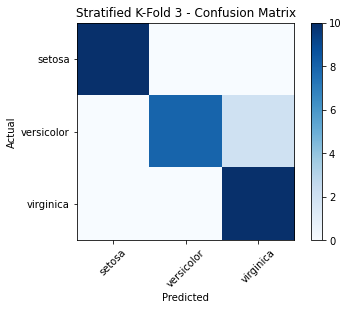

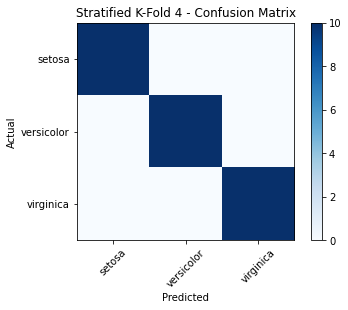

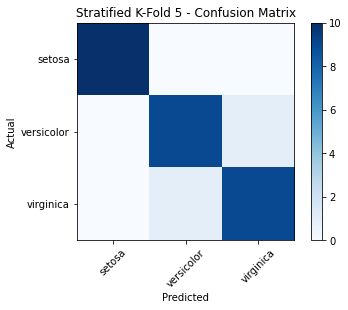

In [11]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict using the trained model
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Stratified K-Fold {i+1} - Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


### Summary:

1. **Consistent Performance**: If the model performs consistently well across all folds, it suggests that it is robust and not overfitting to specific subsets of the data.

2. **Variance in Performance**: If there is significant variance in performance across folds, it may indicate that the model is sensitive to the specific data it's trained on. This could be a sign of overfitting.

3. **Stability of Model**: If the model's performance is stable across different subsets of the data, it implies that it is likely to generalize well to unseen data in real-world applications.

4. **Evaluation Metric**: Depending on the chosen evaluation metric (e.g., accuracy, precision, recall, etc.), cross-validation can help you understand which aspects of the model's performance are strong or weak.

5. **Impact of Data Splitting**: By observing how the model performs on different train-test splits, you can gain insights into the impact of data distribution and composition on the model's performance.

6. **Sensitivity to Class Distribution (if applicable)**: For classification problems, you can observe if the model's performance varies significantly based on the class distribution in different folds. Stratified K-Fold helps mitigate this.

7. **Identifying Overfitting or Underfitting**: If the model consistently performs poorly across all folds, it may indicate underfitting. Conversely, if it performs very well on the training set but poorly on the test set, it may indicate overfitting.

8. **Tuning Model Parameters**: Cross-validation can be used to tune hyperparameters by testing different combinations and choosing the one that performs best on average across folds.

9. **Model Comparison**: You can use cross-validation to compare the performance of different models on the same dataset, helping you choose the best model for your specific problem.

10. **Assessment of Data Quality**: If the model's performance is consistently poor, it may be an indication of issues with the data (e.g., outliers, missing values) that need to be addressed.

